In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import autograd.numpy as np
from autograd import grad
from sklearn import datasets
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
from sklearn.calibration import CalibratedClassifierCV
BLUE, ORANGE, GRAY = '#57B5E8', '#E69E00', '#646369'
import torch
import random
from torch import nn, optim
import math
from IPython import display
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from matplotlib import cm
import seaborn as sns

In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Question 1

In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

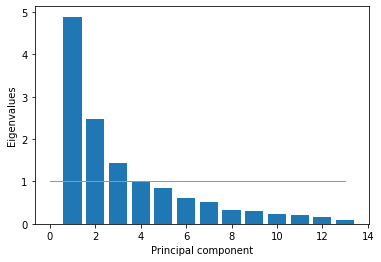

In [5]:
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)
pca = PCA(whiten=True)
train = pca.fit_transform(train)
test = pca.transform(test)
eig_vals = pca.explained_variance_
loadings = pca.components_
covar_explained = eig_vals/sum(eig_vals)*100
classes = 13
plt.bar(np.linspace(1, classes, classes), eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.plot([0,classes], [1,1], color='lime', linewidth=1)

In [6]:
train, test = train_test_split(df, test_size=0.3, random_state=0)
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)
pca_2 = PCA(n_components=2, whiten=True)
train = pca_2.fit_transform(train)
test = pca_2.transform(test)
pca_2.explained_variance_ratio_
train

array([[ 1.17499328, -0.00308246],
       [ 0.07151972,  1.44326704],
       [-1.19231692, -1.69688028],
       [-1.14315043, -0.33013613],
       [ 0.77275626,  0.58402858],
       [-1.279726  , -0.26703055],
       [-1.27608597, -1.27200257],
       [ 0.61766225, -0.02953971],
       [-1.11483223,  0.05050915],
       [-1.03331715,  0.25531762],
       [ 0.51651923,  1.52558713],
       [-1.03305934,  0.69581436],
       [-1.14349628, -0.41244734],
       [ 0.07651718,  0.71730378],
       [ 1.14423422, -0.67367762],
       [-0.32369627,  1.78524453],
       [ 1.11635658,  0.10106066],
       [-0.26242471,  0.44121257],
       [ 0.24677847, -0.26133834],
       [ 1.6097322 , -0.90776664],
       [ 0.71740567,  0.96315695],
       [ 1.15229972,  0.03362396],
       [-1.6246025 , -0.56239445],
       [-0.72521284, -1.53059221],
       [ 0.67214324,  0.89695733],
       [ 0.00375462,  1.30470098],
       [-0.07073994,  1.78468749],
       [-1.08444602, -1.57612348],
       [-1.41758376,

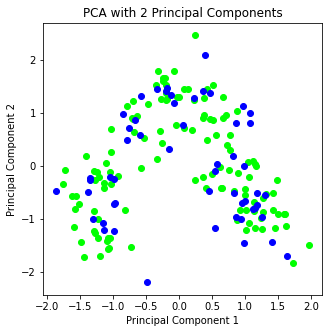

In [7]:
plt.figure(figsize=(5, 5))
plt.scatter(train[:,0], train[:, 1], c='lime')
plt.scatter(test[:,0], test[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA with 2 Principal Components")
plt.show()

# Question 2

In [8]:
train, test = train_test_split(df, test_size=0.3, random_state=0)
train = sc.fit_transform(train)
test = sc.transform(test)

In [9]:
embedded = TSNE(n_components=2)
embedded.fit(df)

/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE()

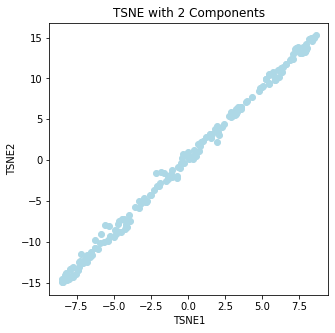

In [10]:
plt.figure(figsize=(5, 5))
plt.scatter(embedded.embedding_[:,0], embedded.embedding_[:, 1], c='lightblue')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title("TSNE with 2 Components")
plt.show()

In [11]:
varyperplex = [5,10,20,25,50,100,150]
kldiv = []
for i in varyperplex:
    train, test = train_test_split(df, test_size=0.3, random_state=0)
    train = sc.fit_transform(train)
    test = sc.transform(test)
    tsne = TSNE(n_components=2, perplexity=i)
    tsne.fit(df)
    kldiv.append(tsne.kl_divergence_)

/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' i

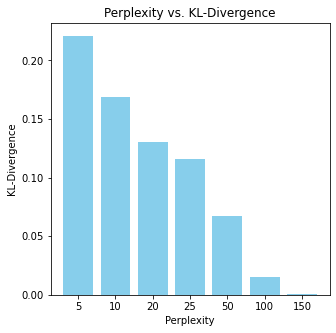

In [12]:
plt.figure(figsize=(5, 5))
for i in range(len(varyperplex)):
    varyperplex[i] = str(varyperplex[i])
plt.bar(varyperplex, kldiv, color='skyblue')
plt.xlabel('Perplexity')
plt.ylabel('KL-Divergence')
plt.title("Perplexity vs. KL-Divergence")
plt.show()

In [13]:
train, test = train_test_split(df, test_size=0.3, random_state=0)
train = sc.fit_transform(train)
test = sc.transform(test)
tsne = TSNE(n_components=2, perplexity=20)
tsne.fit(train)

/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/patriciaguirao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE(perplexity=20)

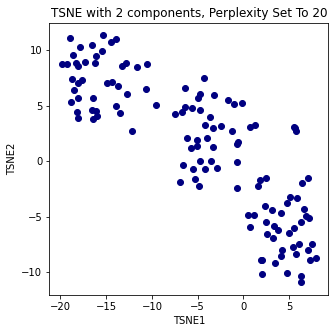

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:, 1], c='navy')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title("TSNE with 2 components, Perplexity Set To 20")
plt.show()

# Question 3

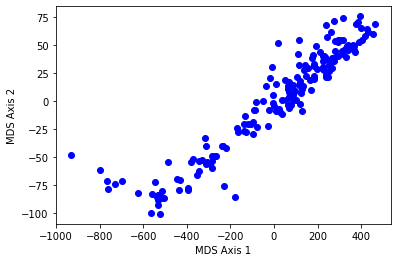

19261.976606916327


In [15]:
arr = np.array(df)
dataVec = np.ndarray.flatten(arr)
dataVec = dataVec[~np.isnan(dataVec)]
D = metrics.pairwise_distances(df)
mds = MDS(n_components=2, n_init=100, max_iter = 10000, dissimilarity='precomputed', random_state=0)
mdsSolution = mds.fit_transform(D)
plt.scatter(mdsSolution[:,0], mdsSolution[:,1], color='blue')
for ii in range(len(mdsSolution)):
    plt.text(mdsSolution[ii,0], mdsSolution[ii,1],'')
plt.xlabel('MDS Axis 1')
plt.ylabel('MDS Axis 2')
plt.show()
print(mds.stress_)

In [16]:
t = np.sqrt(mds.stress_/(0.5*np.sum(df.values**2)))
t

0.018010074536651818

# Question 4

For n_clusters = 2 The average silhouette_score is : 0.5665673
For n_clusters = 3 The average silhouette_score is : 0.59528375
For n_clusters = 4 The average silhouette_score is : 0.50846183
For n_clusters = 5 The average silhouette_score is : 0.42328253
For n_clusters = 6 The average silhouette_score is : 0.4016593


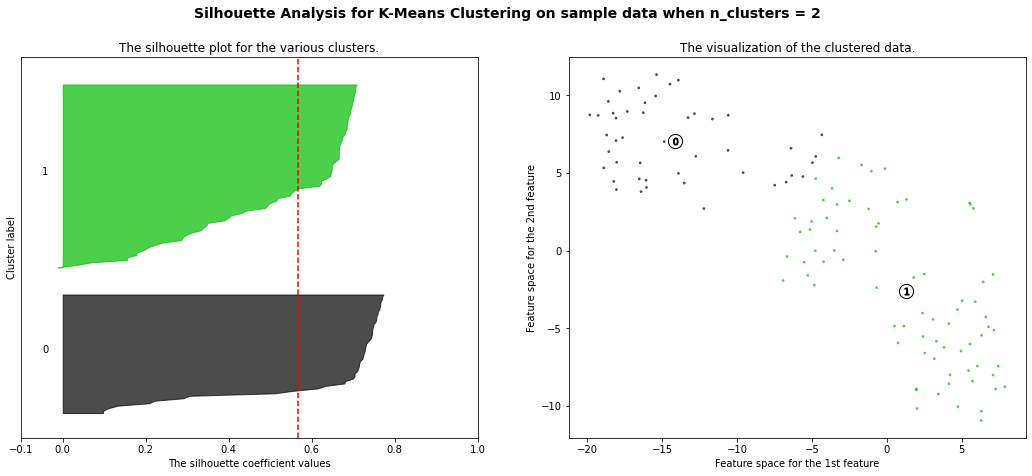

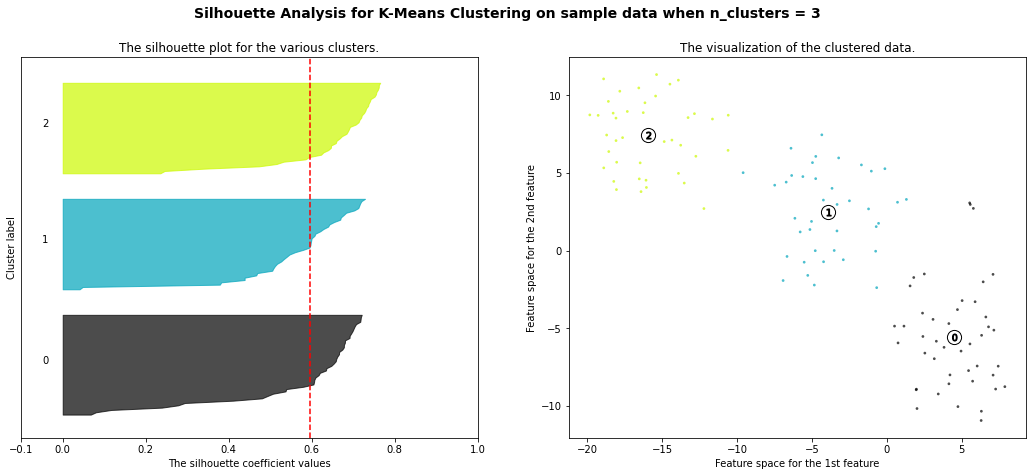

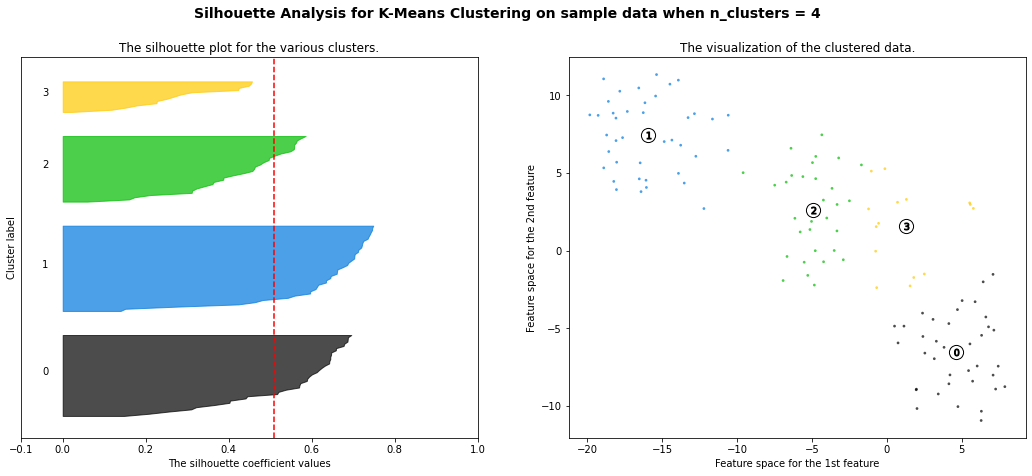

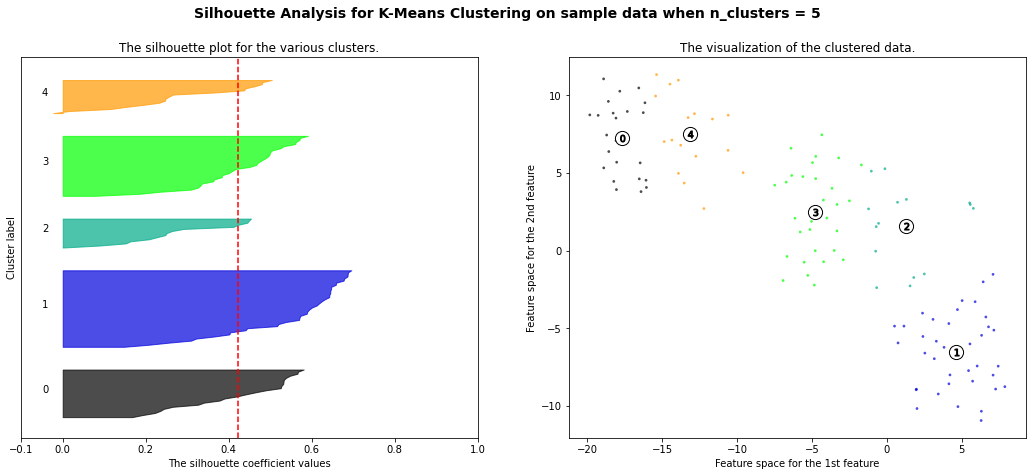

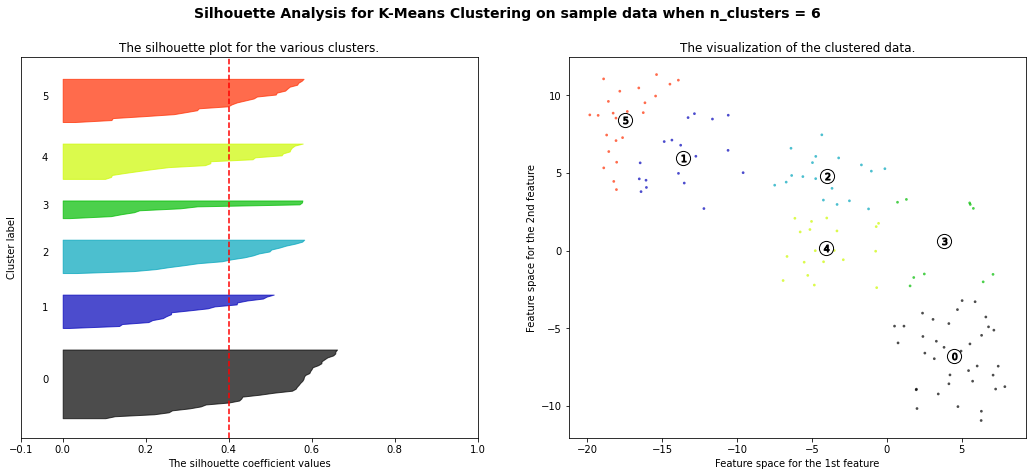

In [17]:
data = tsne.embedding_
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette Analysis for K-Means Clustering on sample data when n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.59528375


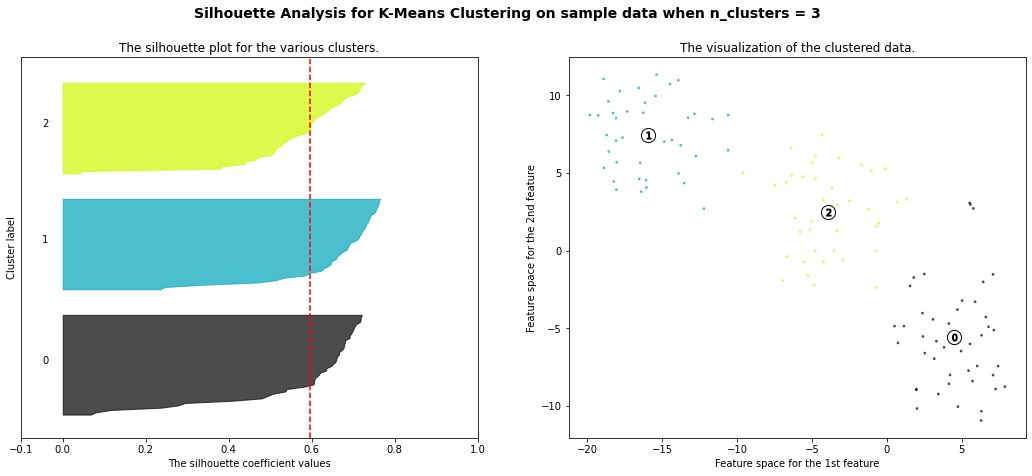

In [18]:
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette Analysis for K-Means Clustering on sample data when n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [19]:
clusterer.inertia_

1666.5833740234375

# Question 5

In [20]:
data = tsne.embedding_

In [21]:
def make_scatter_plot (df, x="x_1", y="x_2", hue="label",
                       palette={0: "red", 1: "olive", 2: "blue", 3: "green"},
                       size=5,
                       centers=None):
    if (hue is not None) and (hue in df.columns):
        sns.lmplot (x=x, y=y, hue=hue, data=df, palette=palette,
                    fit_reg=False)
    else:
        sns.lmplot (x=x, y=y, data=df, fit_reg=False)

    if centers is not None:
        plt.scatter (centers[:,0], centers[:,1],
                     marker=u'*', s=500,
                     c=[palette[0]])

def make_scatter_plot2 (df, x="x_1", y="x_2", hue="label", size=5):
    if (hue is not None) and (hue in df.columns):
        sns.lmplot (x=x, y=y, hue=hue, data=df,
                    fit_reg=False)
    else:
        sns.lmplot (x=x, y=y, data=df, fit_reg=False)

In [22]:
def region_query (p, eps, X):
    
    _, dim = X.shape
    assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))
    
    return np.linalg.norm (p - X, axis=1) <= eps

def index_set (y):

    assert len (y.shape) == 1

    return set (np.where (y)[0])

def find_neighbors (eps, X):
    m, d = X.shape
    neighbors = []

    for i in range (len (X)):
        n_i = index_set (region_query (X[i, :], eps, X))
        neighbors.append (n_i)

    assert len (neighbors) == m
    return neighbors

def find_core_points (s, neighbors):
    assert type (neighbors) is list
    assert all ([type (n) is set for n in neighbors])
    
    core_set = set ()

    for i, n_i in enumerate (neighbors):
        if len (n_i) >= s:
            core_set.add (i)

    return core_set

def expand_cluster (p, neighbors, core_set, visited, assignment):

    assert (p in core_set) and (p in visited) and (p in assignment)
    
    reachable = set (neighbors[p])
    while reachable:
        q = reachable.pop ()
        
        if q not in visited:
            visited.add (q)
            if q in core_set:
                reachable |= neighbors[q]
        if q not in assignment:
            assignment[q] = assignment[p]
    
def dbscan (eps, s, X):
    clusters = []
    point_to_cluster = {}
    
    neighbors = find_neighbors (eps, X)
    core_set = find_core_points (s, neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set:
        if i not in visited:
            visited.add (i)
            assignment[i] = next_cluster_id
            expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    return assignment, core_set

In [23]:
def plot_labels (df, labels):
    df_labeled = df.copy ()
    df_labeled['label'] = labels
    make_scatter_plot2 (df_labeled)

Number of core points: 103
Number of clusters: 4
Number of unclassified points: 7
Number of core points: 70
Number of clusters: 4
Number of unclassified points: 22
Number of core points: 31
Number of clusters: 4
Number of unclassified points: 44
Number of core points: 10
Number of clusters: 4
Number of unclassified points: 71
Number of core points: 121
Number of clusters: 1
Number of unclassified points: 3
Number of core points: 120
Number of clusters: 1
Number of unclassified points: 3
Number of core points: 120
Number of clusters: 1
Number of unclassified points: 3
Number of core points: 117
Number of clusters: 1
Number of unclassified points: 3
Number of core points: 124
Number of clusters: 1
Number of unclassified points: 0
Number of core points: 124
Number of clusters: 1
Number of unclassified points: 0
Number of core points: 124
Number of clusters: 1
Number of unclassified points: 0
Number of core points: 124
Number of clusters: 1
Number of unclassified points: 0


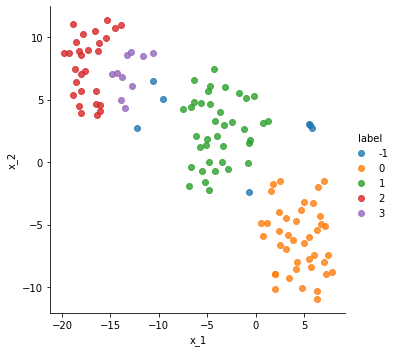

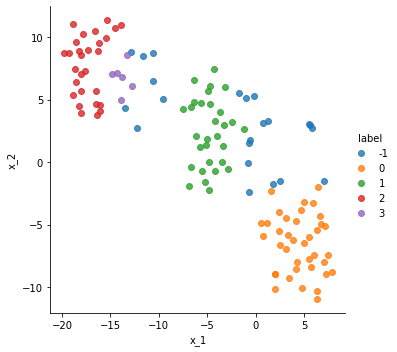

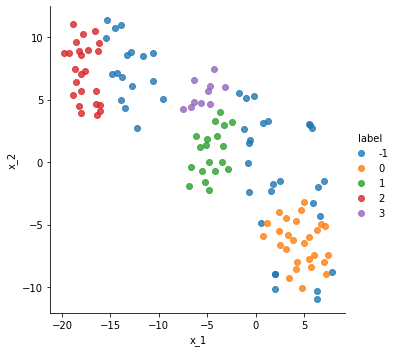

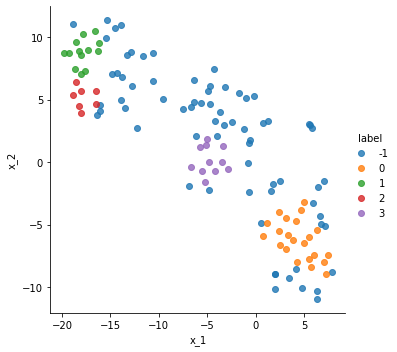

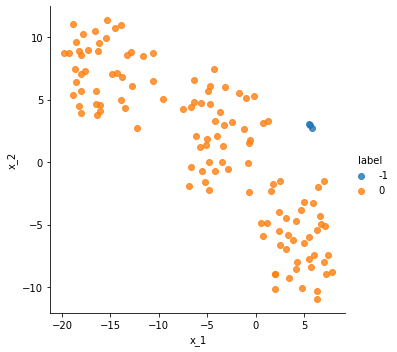

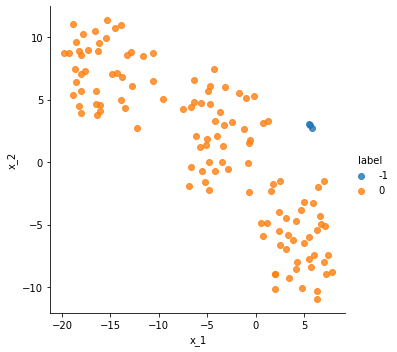

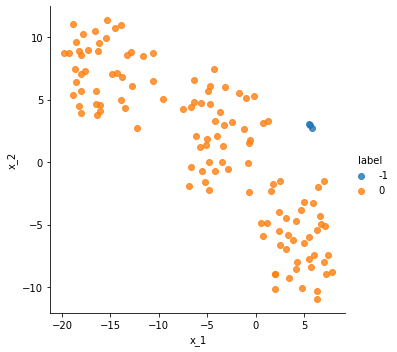

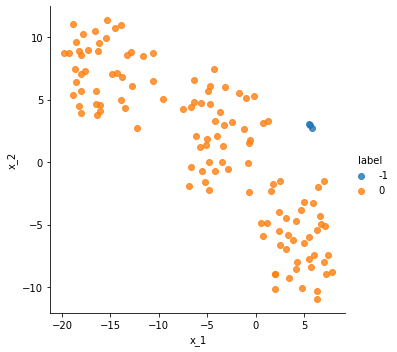

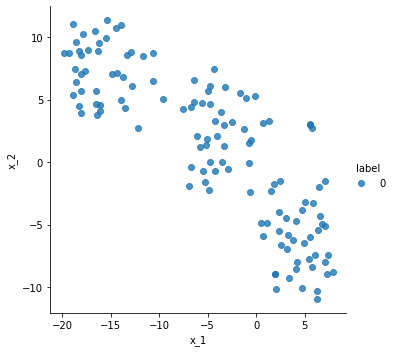

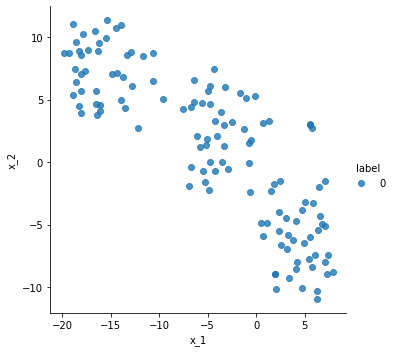

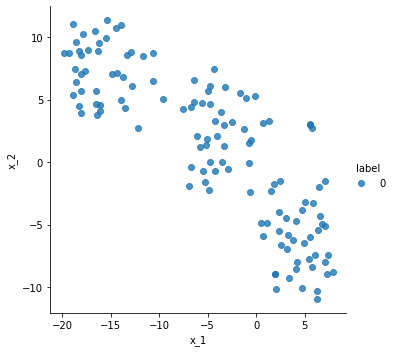

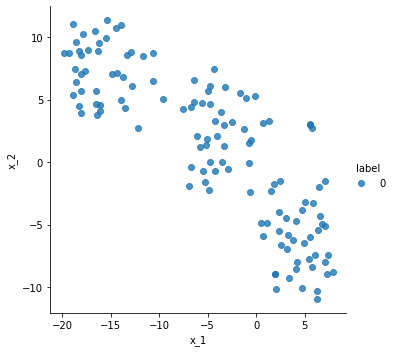

In [24]:
ep = [2,4,8]
p = [4,6,8,10]

for eppi in ep:
    for pointi in p:
        data = tsne.embedding_
        assignment, core_set = dbscan(eppi, pointi, data)

        print ("Number of core points:", len (core_set))
        print ("Number of clusters:", max (assignment.values ()) + 1)
        print ("Number of unclassified points:", len (data) - len (assignment))

        labels = [-1] * len (data)
        for i, c in assignment.items ():
            labels[i] = c
        plot_labels (pd.DataFrame(tsne.embedding_,columns=["x_1","x_2"]), labels)

Number of core points: 103
Number of clusters: 4
Number of unclassified points: 7


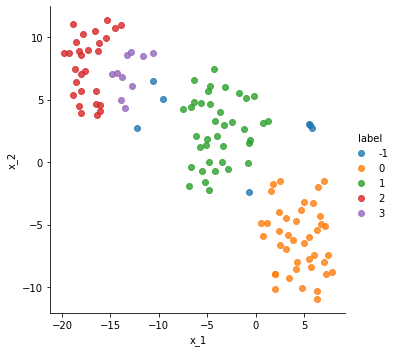

In [25]:
data = tsne.embedding_
assignment, core_set = dbscan(2, 4, data)

print ("Number of core points:", len (core_set))
print ("Number of clusters:", max (assignment.values ()) + 1)
print ("Number of unclassified points:", len (data) - len (assignment))

labels = [-1] * len (data)
for i, c in assignment.items ():
    labels[i] = c
plot_labels (pd.DataFrame(tsne.embedding_,columns=["x_1","x_2"]), labels)

# Extra Credit

In [26]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alkalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavonoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Stilbenes,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [27]:
df['Alcohol']. corr(df['Color_Intensity'])

0.5463641950837039